In [1]:
#RIPE-SENSE: MANGO QUALITY GRADING WITH IMAGE ANALYSIS AND DEEP LEARNING

In [2]:
!pip install tensorflow==2.15

In [3]:
import tensorflow as tf

In [4]:
import numpy as np

In [5]:
data = "Grading_dataset"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 20,
    width_shift_range= 0.0,
    height_shift_range= 0.0,
    shear_range= 0.0,
    zoom_range=0.0,
    horizontal_flip = True,
    validation_split=0.2
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    "Grading_dataset",
    target_size = (128,128),
    batch_size = 20,
    class_mode = "categorical",
    subset= "training"
)

Found 480 images belonging to 3 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(
    "Grading_dataset",
    target_size = (128,128),
    batch_size = 20,
    class_mode = "categorical",
    subset = "validation"
)

Found 120 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    "Grading_dataset",
    target_size =(128,128),
    batch_size = 20,
    class_mode = "categorical")

Found 600 images belonging to 3 classes.


In [11]:
print(len(train_generator))
print(len(validation_generator))


24
6


In [12]:
import matplotlib.pyplot as plt
def show_image_samples(generator):
  class_indices = generator.class_indices
  class_names = list(class_indices.keys())
  images, labels= next(generator)
  plt.figure(figsize=(10,10))
  for i in range(min(images.shape[0],25)):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
  plt.show()

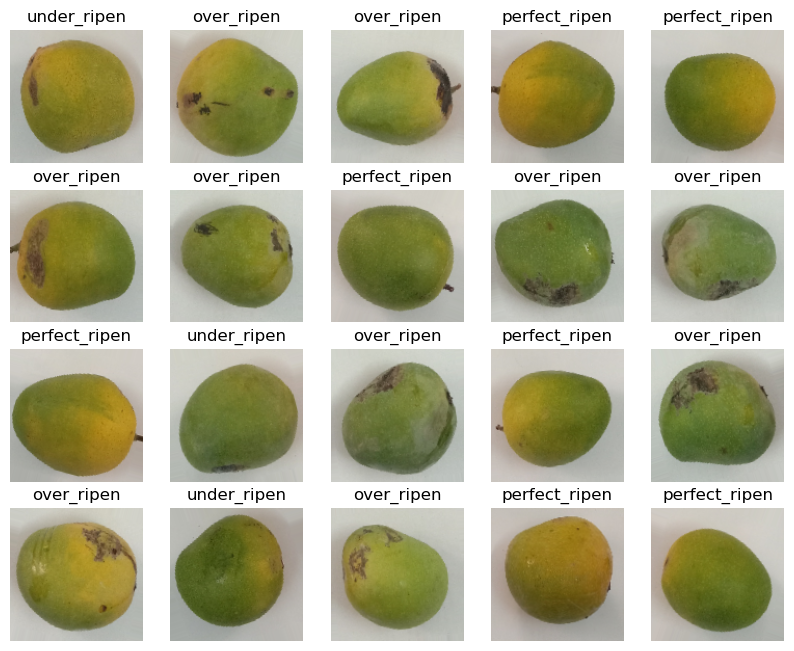

In [13]:
show_image_samples(train_generator)

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [15]:
vgg = VGG16(include_top=False,input_shape=(128,128,3))
vgg.trainalbe = False

In [16]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [17]:
for layer in vgg.layers:
  print(layer)

In [18]:
for layer in vgg.layers:
  layer.trainable=False

In [19]:
x = Flatten()(vgg.output)

In [20]:
output = Dense(3,activation='softmax')(x)

In [21]:
vgg16 = Model(vgg.input,output)

In [22]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [23]:
vgg16.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
history = vgg16.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10


24/24 [==============================] - 31s 1s/step - loss: 0.9295 - accuracy: 0.4938 - val_loss: 0.7848 - val_accuracy: 0.5833
Epoch 2/10
24/24 [==============================] - 26s 1s/step - loss: 0.6101 - accuracy: 0.7437 - val_loss: 0.6662 - val_accuracy: 0.7417
Epoch 3/10
24/24 [==============================] - 29s 1s/step - loss: 0.4887 - accuracy: 0.8313 - val_loss: 0.5817 - val_accuracy: 0.7583
Epoch 4/10
24/24 [==============================] - 30s 1s/step - loss: 0.4396 - accuracy: 0.8562 - val_loss: 0.7788 - val_accuracy: 0.6250
Epoch 5/10
24/24 [==============================] - 34s 1s/step - loss: 0.4043 - accuracy: 0.8479 - val_loss: 0.5159 - val_accuracy: 0.7583
Epoch 6/10
24/24 [==============================] - 36s 2s/step - loss: 0.3697 - accuracy: 0.8792 - val_loss: 0.5380 - val_accuracy: 0.8083
Epoch 7/10
24/24 [==============================] - 36s 2s/step - loss: 0.3459 - accuracy: 0.8750 - val_loss: 0.5000 - val_accuracy: 0.8333
Epoch 8/10
24/24 [

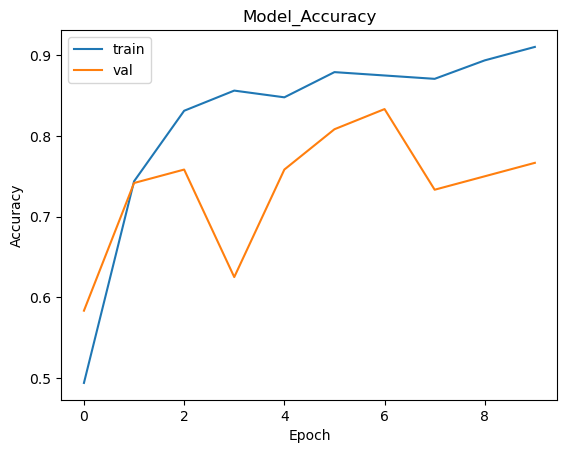

In [25]:
import matplotlib.pyplot as plt
#plot accuracy for both validation and training datasets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model_Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train','val'], loc='upper left')
plt.show()

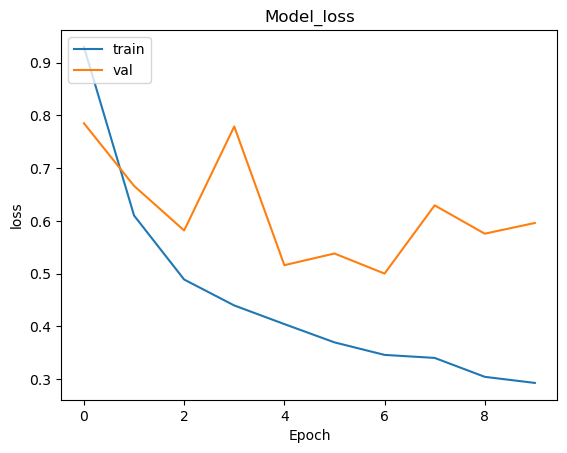

In [26]:
#plot loss for both validation and training datasets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 173ms/step
predicted class: perfect_ripen


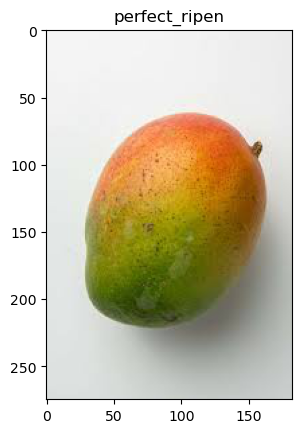

In [43]:
#predicting the class of test image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
#load the test image
test_image = load_img("mango1.jpeg", target_size = (128,128))
#convert the image to numpy array
test_image_array = img_to_array(test_image)
#preprocess the image (same as training data preprocessing)
test_image_array = test_image_array/255.0
#reshape the array to match the input shape of the model
test_image_array = test_image_array.reshape((1,128,128,3))
#make a prediction using the model
prediction = vgg16.predict(test_image_array)
#print the predicted class
predicted_class_index = np.argmax(prediction)
class_names = ['over_ripen','perfect_ripen','under_ripen']
predicted_class_name = class_names[predicted_class_index]
print("predicted class:",predicted_class_name)
#display the test image
plt.imshow(image.load_img("mango1.jpeg"))
plt.title(predicted_class_name)
plt.show()

In [28]:
#CNN model 
#importing the model building libraries
from tensorflow.keras import layers
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import glorot_uniform, glorot_normal, he_uniform
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import seaborn as sns
from keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [29]:
model = Sequential()
model.add(Convolution2D((64),(3,3),kernel_initializer=glorot_uniform(seed=10),input_shape = (128,128,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=64,kernel_initializer=he_uniform(seed=10),activation='relu')) #first Hidden layer
model.add(Dense(units=64,kernel_initializer=he_uniform(seed=10),activation='relu')) #second hidden layer
model.add(Dense(units=3,kernel_initializer=he_uniform(seed=10),activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 254016)            0         
                                                                 
 dense_1 (Dense)             (None, 64)                16257088  
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                        

In [31]:
model.compile(optimizer = 'rmsprop',loss='categorical_crossentropy',metrics=["accuracy"])


In [32]:
history2 = model.fit(train_generator,epochs =10, validation_data = validation_generator)

Epoch 1/10
24/24 [==============================] - 15s 542ms/step - loss: 3.9792 - accuracy: 0.3250 - val_loss: 1.1231 - val_accuracy: 0.3333
Epoch 2/10
24/24 [==============================] - 11s 476ms/step - loss: 1.0929 - accuracy: 0.3750 - val_loss: 1.0960 - val_accuracy: 0.3333
Epoch 3/10
24/24 [==============================] - 11s 460ms/step - loss: 1.0435 - accuracy: 0.5063 - val_loss: 0.9948 - val_accuracy: 0.5083
Epoch 4/10
24/24 [==============================] - 11s 478ms/step - loss: 1.0217 - accuracy: 0.4812 - val_loss: 0.9741 - val_accuracy: 0.5000
Epoch 5/10
24/24 [==============================] - 11s 468ms/step - loss: 0.9797 - accuracy: 0.5354 - val_loss: 1.0030 - val_accuracy: 0.4833
Epoch 6/10
24/24 [==============================] - 11s 475ms/step - loss: 0.9714 - accuracy: 0.5250 - val_loss: 0.9646 - val_accuracy: 0.5083
Epoch 7/10
24/24 [==============================] - 11s 467ms/step - loss: 0.8988 - accuracy: 0.5792 - val_loss: 0.9518 - val_accuracy: 0.5167

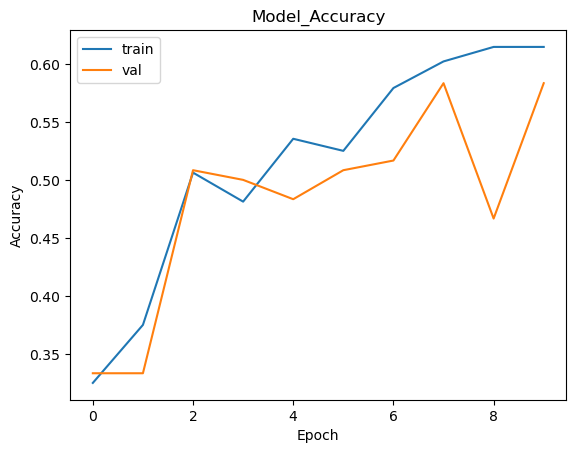

In [33]:
import matplotlib.pyplot as plt
#plot accuracy for both validation and training datasets
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model_Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train','val'], loc='upper left')
plt.show()

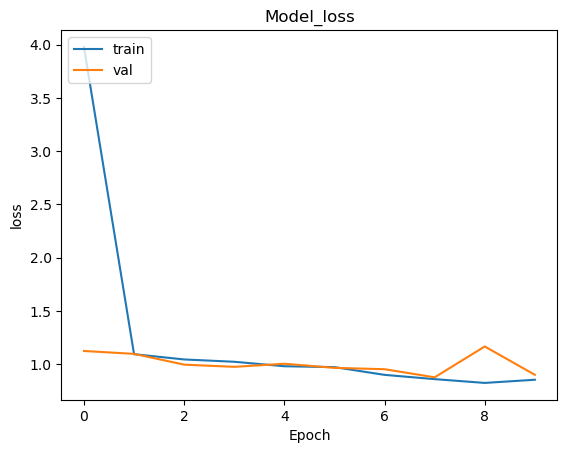

In [34]:
#plot loss for both validation and training datasets
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 208ms/step
predicted class: perfect_ripen


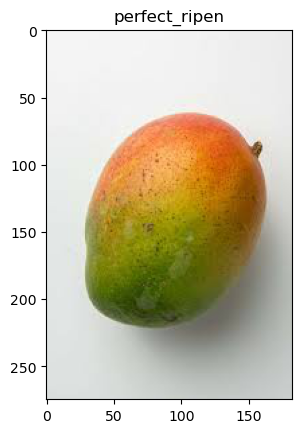

In [35]:
#predicting the ripenese of test image using CNN model 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
#load the test image
test_image = load_img("mango1.jpeg", target_size = (128,128))
#convert the image to numpy array
test_image_array = img_to_array(test_image)
#preprocess the image (same as training data preprocessing)
test_image_array = test_image_array/255.0
#reshape the array to match the input shape of the model
test_image_array = test_image_array.reshape((1,128,128,3))
#make a prediction using the model
prediction = model.predict(test_image_array)
#print the predicted class
predicted_class_index = np.argmax(prediction)
class_names = ['over_ripen','perfect_ripen','under_ripen']
predicted_class_name = class_names[predicted_class_index]
print("predicted class:",predicted_class_name)
#display the test image
plt.imshow(image.load_img("mango1.jpeg"))
plt.title(predicted_class_name)
plt.show()

In [36]:
# Function to plot confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

6/6 [==============================] - 11s 1s/step


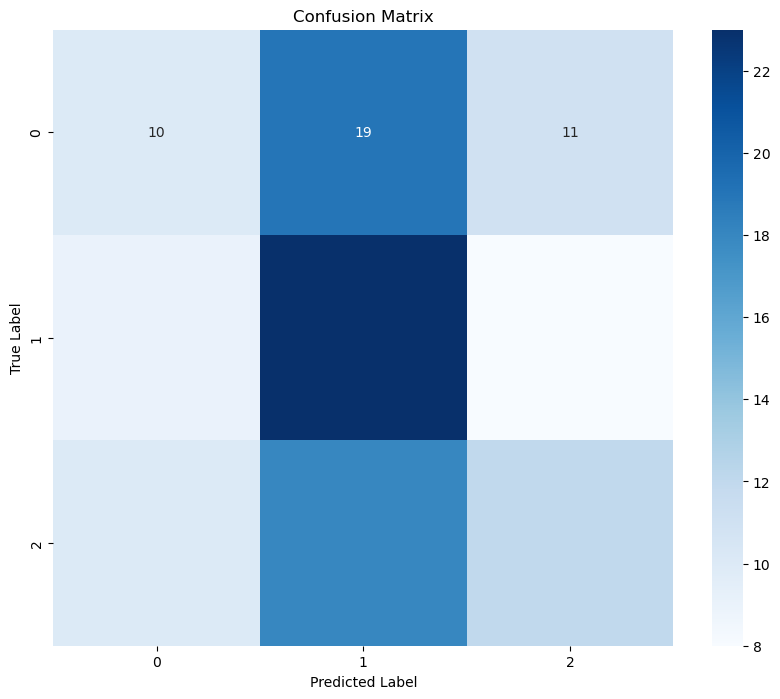

In [37]:
# Plotting Confusion Matrix
y_pred = vgg16.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
plot_confusion_matrix(validation_generator.classes, y_pred_classes)

In [38]:
#TESTING Accuracy on valisation of VGG16 dataset 
loss, accuracy = vgg16.evaluate(validation_generator)
print("Validation Accuracy : {:.2f}%".format(accuracy*100))

6/6 [==============================] - 7s 1s/step - loss: 0.6122 - accuracy: 0.6917
Validation Accuracy : 69.17%


In [39]:
#testing accuracy on training dataset
loss, accuracy = vgg16.evaluate(test_generator)
print("Test Accuracy : {:.2f}%".format(accuracy*100))

30/30 [==============================] - 37s 1s/step - loss: 0.3597 - accuracy: 0.8667
Test Accuracy : 86.67%


In [40]:
#TESTING Accuracy on valisation dataset with cnn(sequential)
loss, accuracy = model.evaluate(validation_generator)
print("Validation Accuracy : {:.2f}%".format(accuracy*100))

6/6 [==============================] - 2s 279ms/step - loss: 0.9022 - accuracy: 0.6000
Validation Accuracy : 60.00%


In [41]:
#testing accuracy on training dataset with cnn(sequential)
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy : {:.2f}%".format(accuracy*100))

30/30 [==============================] - 4s 147ms/step - loss: 0.7103 - accuracy: 0.6967
Test Accuracy : 69.67%


In [42]:
#save and load the best model
vgg16.save('vgg16_model.h5')

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
